In [9]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np             

In [10]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [11]:
pwd

'C:\\Users\\Manish'

In [12]:
df=pd.read_csv('C:\\Users\\Manish\\data (1) (1).csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [10]:
print("Row and Column before removing outliers: ",df.shape)
print("Wait till shape after removing outlier is printed......")

def myOutliers(df, col):
    Q3 = np.quantile(df[col],0.75)
    Q1 = np.quantile(df[col],0.25)
    
    IQR = Q3 - Q1
    
    global mylist
    global my_outlier_df
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    print("Lower range of ",col,"is",lower_range)
    print("Upper range of ",col,"is",upper_range)
    mylist = [x for x in df[col] if ((x < lower_range) | (x> upper_range))]
    print("Total outliers in",col,"are",len(mylist))
    my_outlier_df = df.loc[df[col].isin(mylist)]
    
k=["area","floor","hoa (R$)","property tax (R$)","rent amount (R$)","fire insurance (R$)"]                    


for i in k:
    print("i is: ",i)
    myOutliers(df, i)
    print("********************************************************************************************")
    

Row and Column before removing outliers:  (10692, 13)
Wait till shape after removing outlier is printed......
i is:  area
Lower range of  area is -133.0
Upper range of  area is 371.0
Total outliers in area are 672
********************************************************************************************
i is:  floor
Lower range of  floor is -9.5
Upper range of  floor is 18.5
Total outliers in floor are 277
********************************************************************************************
i is:  hoa (R$)
Lower range of  hoa (R$) is -1431.25
Upper range of  hoa (R$) is 2838.75
Total outliers in hoa (R$) are 717
********************************************************************************************
i is:  property tax (R$)
Lower range of  property tax (R$) is -467.5
Upper range of  property tax (R$) is 880.5
Total outliers in property tax (R$) are 1081
********************************************************************************************
i is:  rent amount (R$)
Lowe

In [20]:
d = df[(df.animal == "acept")]
a= d.groupby (by=['city'])["rent amount (R$)"].value_counts()
a
                          

city            rent amount (R$)
Belo Horizonte  1100                40
                15000               27
                1000                26
                1500                26
                1600                26
                                    ..
São Paulo       19500                1
                24000                1
                25000                1
                30000                1
                45000                1
Name: rent amount (R$), Length: 1789, dtype: int64

In [51]:
ad=df.describe()      
ad

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [22]:
a= df.groupby (by=['city'])["area"].mean()
a

city
Belo Horizonte    207.411765
Campinas          137.561547
Porto Alegre      103.609388
Rio de Janeiro    105.347768
São Paulo         158.899439
Name: area, dtype: float64

In [17]:
mean=int(df.area.mean())
x=df[df["area"]>=11].index
for index in x:
    df.loc[index,"area"]= mean

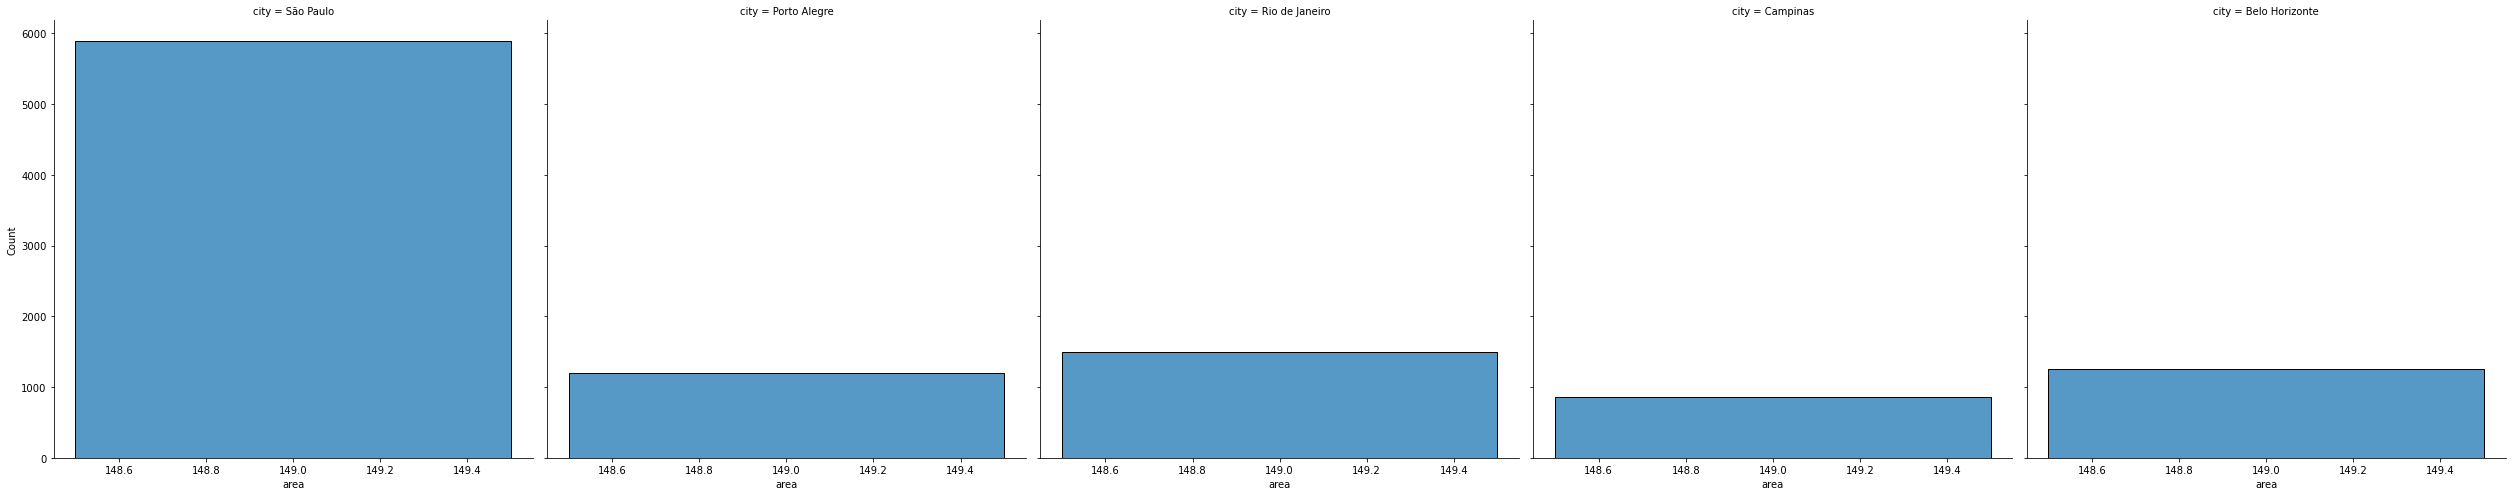

In [18]:
l=sns.FacetGrid(df,col="city",height=7)
l.map(sns.histplot,'area')
plt.show()

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64


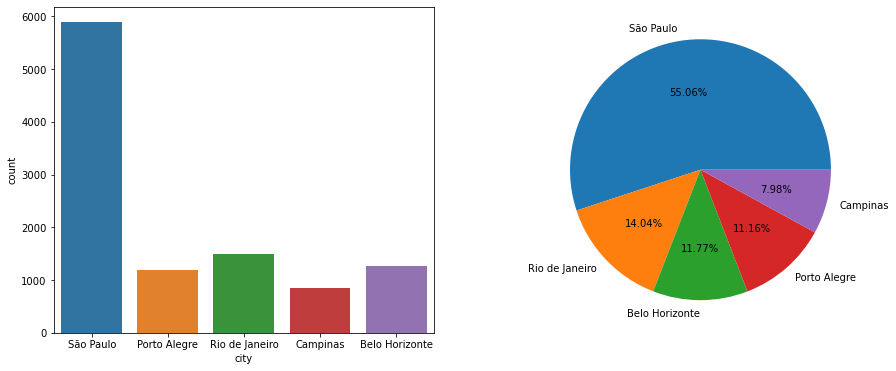

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
percentage = (df["city"].value_counts()/len(df))*100      # value count is a function to calulate the number of the column city 
                                                                        #keeping its classes as index. 
print(percentage)
sns.countplot(x = df["city"], ax = ax[0])
labels = list(df["city"].value_counts().index)            # value_counts returns the count of the classes present in the city and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
ax[1].pie(percentage,labels = labels, autopct= "%0.2f%%")           # autpct: is the way how the number would print on the graph.
plt.show()                                                            


<AxesSubplot:xlabel='city', ylabel='count'>

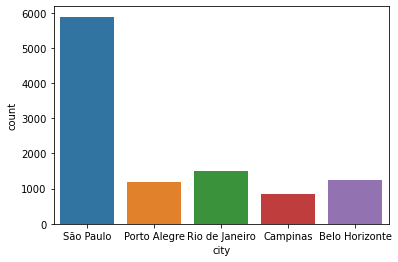

In [55]:
sns.countplot(x=df["city"])

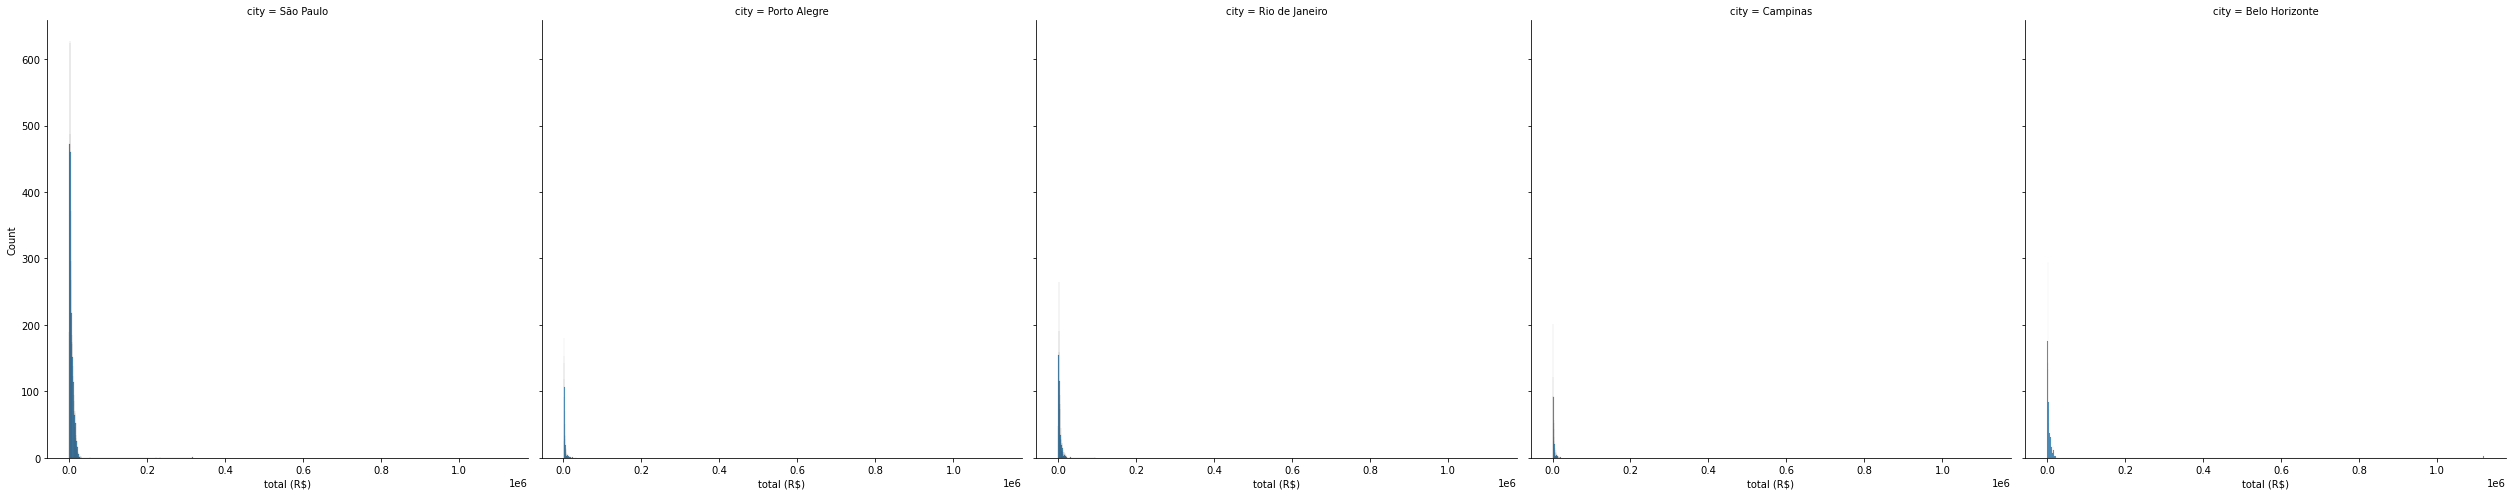

In [19]:
l=sns.FacetGrid(df,col="city",height=7)
l.map(sns.histplot,'total (R$)')
plt.show()

In [23]:
a= df.groupby (by=['city'])["rent amount (R$)"].mean()
a

city
Belo Horizonte    3664.127981
Campinas          2364.290739
Porto Alegre      2337.699916
Rio de Janeiro    3232.904064
São Paulo         4652.793783
Name: rent amount (R$), dtype: float64

In [24]:
a= df.groupby (by=['city'])["total (R$)"].mean()
a

city
Belo Horizonte    6315.242448
Campinas          3173.276671
Porto Alegre      2989.782900
Rio de Janeiro    4611.684877
São Paulo         6380.831833
Name: total (R$), dtype: float64

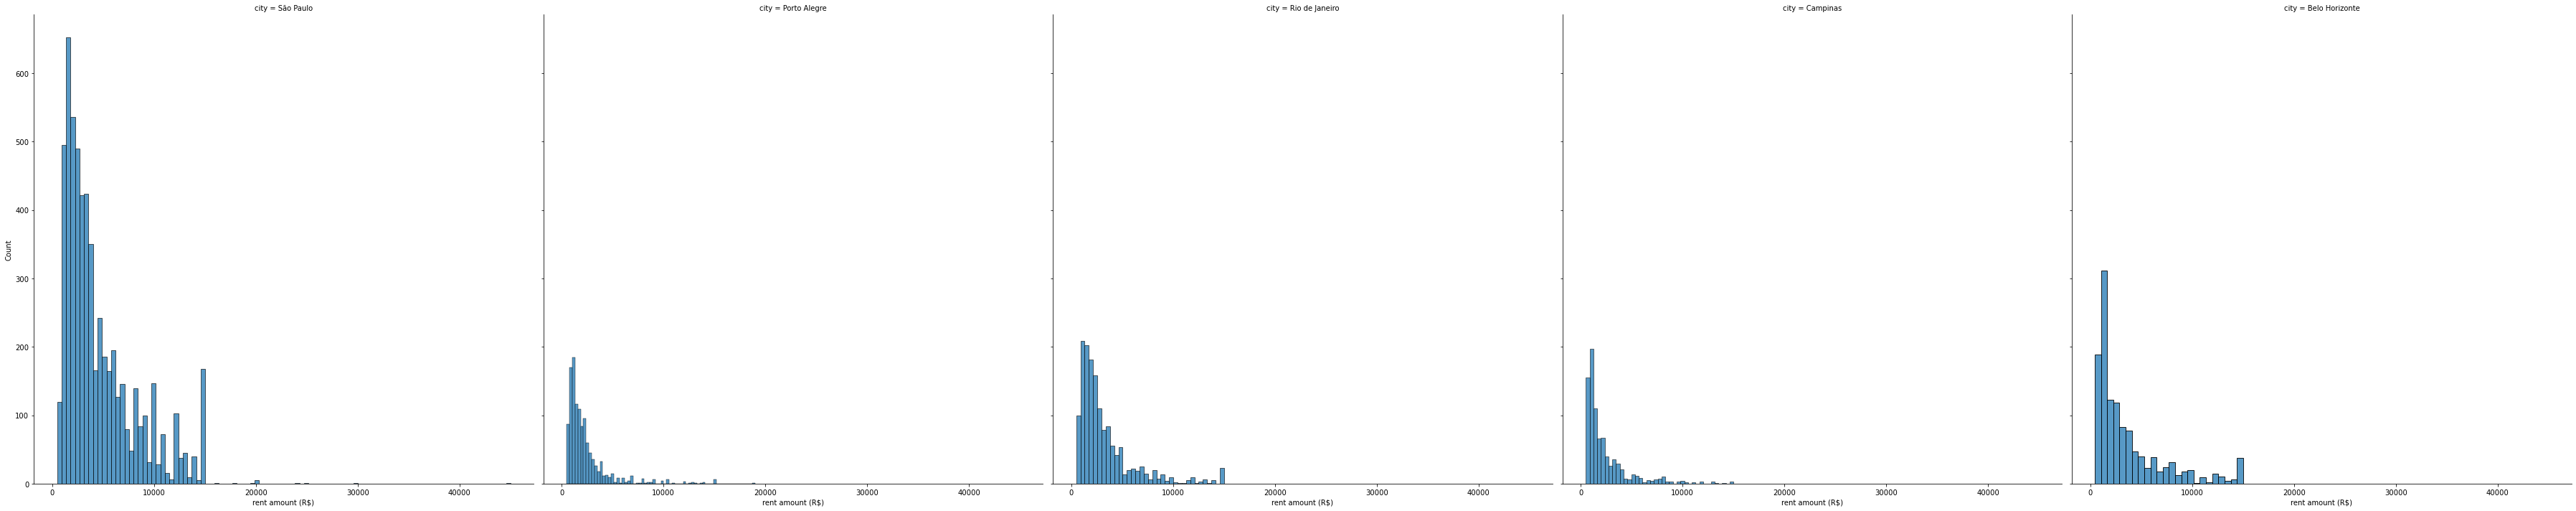

In [129]:
# Analysis of City wise rent amount.

g = sns.FacetGrid(df, col = "city", height = 10)
g.map(sns.histplot, "rent amount (R$)")
plt.show()

#### Conclusion: As per the analysis City Porto Alegre is a good choice to relocate.

Performed outlier analysis.

As performed average area by each city, Porto Alegre city has more average area after the São Paulo and Rio de Janeiro.

Performed analysis and found that the average rent amount, and average total rent amount(including all the taxes) by city,
  Porto Alegre city is cheeper than others.
  
So, area wise, rent, total amount(including taxes) we found that city Porto Alegre is good for the relocation(to work and for living as well on the basis of rooms area, rent, taxes, total rent).   

As city São Paulo and Rio de Janeiro are costly (to work from and for living also), hence city City Porto Alegre is a good choice to relocate.